<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>ANN - Churn Modeling</b></p>

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

In [27]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()
# Tenure:Number of years for which the customer has been with the bank
# NumOfProducts :Number of bank products the customer is utilising
# Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
# "RowNumber" column is determined as index

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# <font color='orange'> <b>Exploratory Data Analysis and Visualization</b><font color='black'>  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [30]:
df.shape

(10000, 13)

In [31]:
df.isnull().sum().any()

False

In [32]:
df.duplicated().sum()

0

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [34]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [35]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

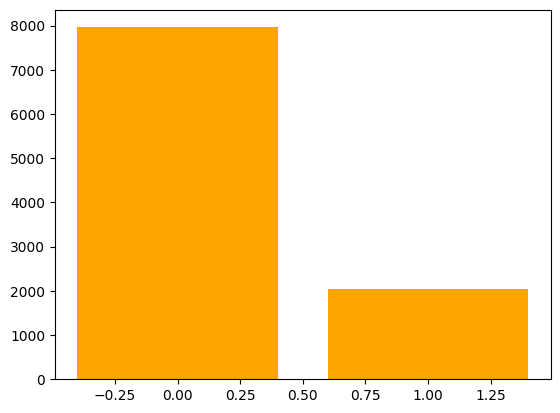

In [179]:
value_counts = df['Exited'].value_counts()

plt.bar(value_counts.index, value_counts.values, color='orange')
plt.show()

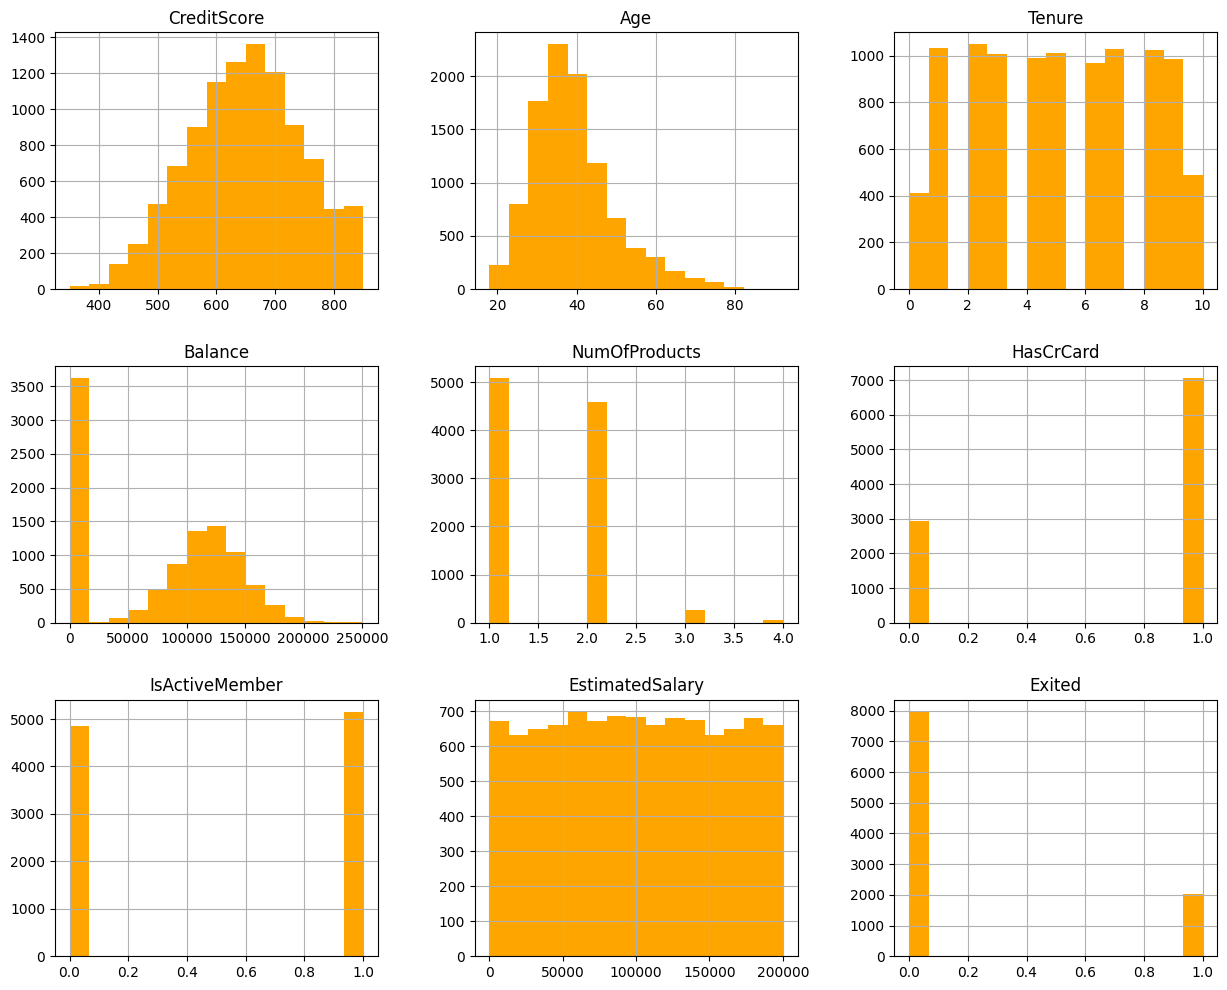

In [181]:
df.hist(figsize=(15, 12), bins=15, color='orange')
plt.show()

In [38]:
# plt.figure(figsize=(16, 12))
# sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [39]:
# Those who get errors in the above code can run the code below.

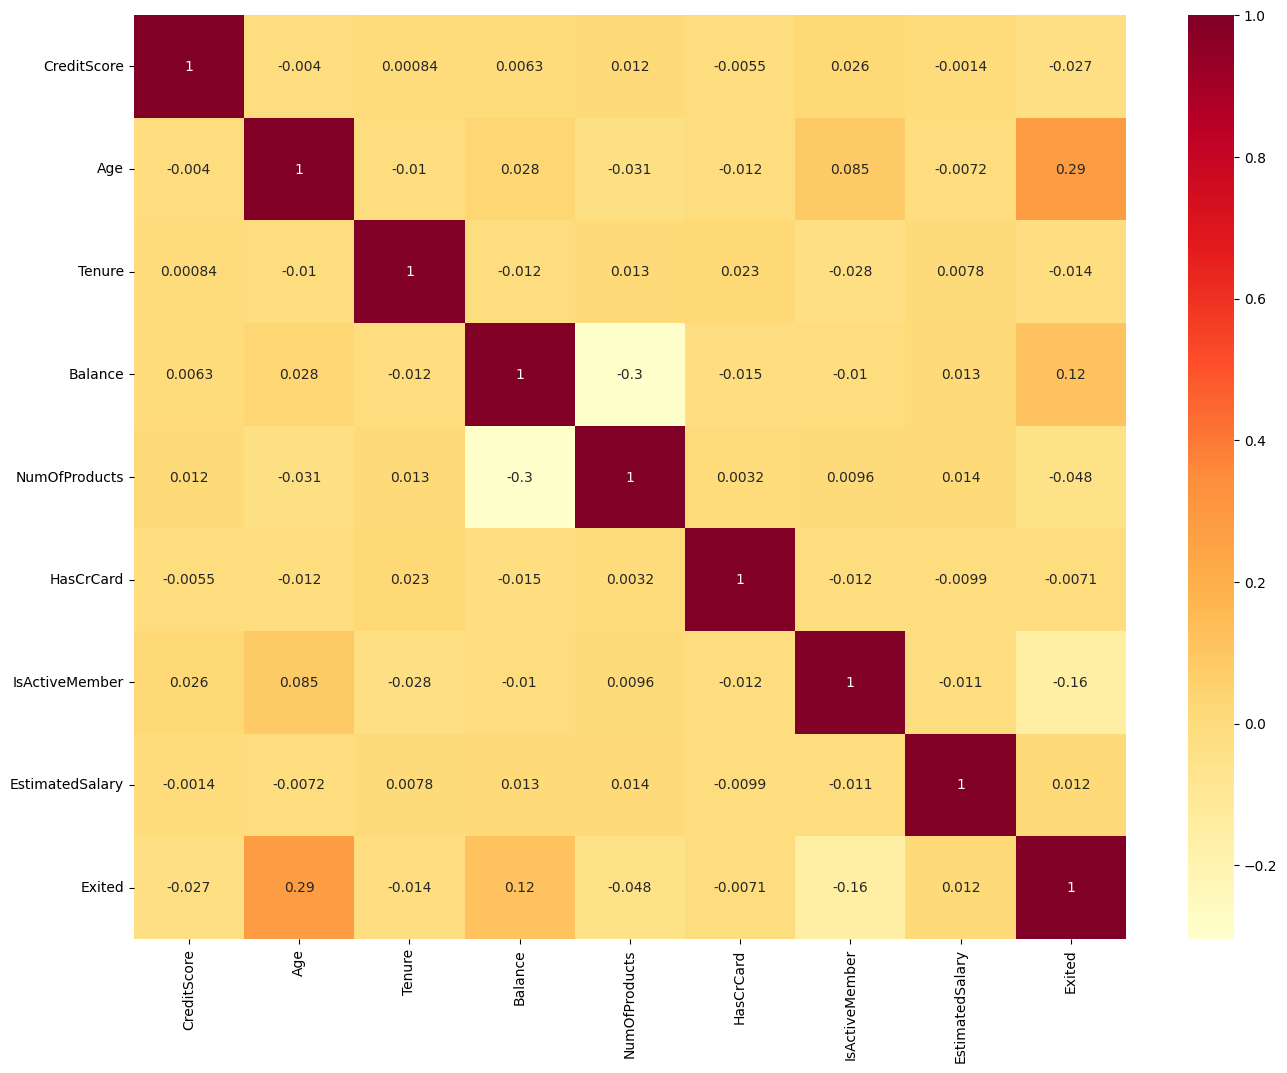

In [185]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='YlOrRd')
plt.show()

In [41]:
# df.corr()['Exited'][:-1].sort_values().plot.barh()

In [42]:
# Those who get errors in the above code can run the code below.

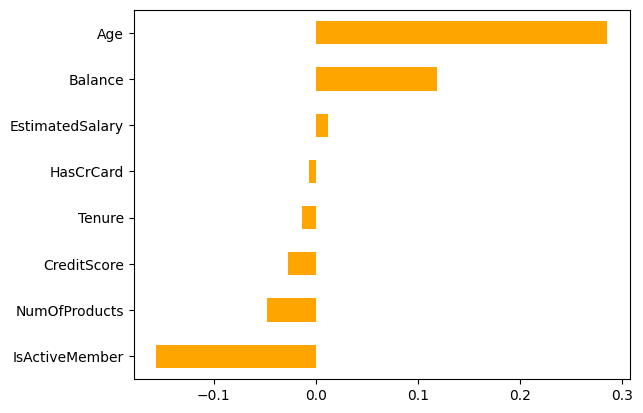

In [187]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Exited'][:-1].sort_values()
correlation_series.plot.barh(color='orange')
plt.show()

In [44]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
2,608,41,1,83807.860,1,0,1,112542.580,0,False,True,False
3,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
4,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
5,850,43,2,125510.820,1,1,1,79084.100,0,False,True,False


# <font color='orange'> <b>Preprocessing of Data</b><font color='black'>  

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <font color='orange'> <b>Modelling & Model Performance</b><font color='black'>  

## <font color='gold'> <b>without class_weigth</b><font color='black'>  

In [52]:
X_train.shape

(9000, 11)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [54]:
from tensorflow.keras.optimizers import Adam

In [55]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))  
model.add(Dense(16, activation="relu"))  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# Recall — the percentage of positive cases you caught
# Recall is an important metric when a false negative cannot be ignored.  recall = TP / TP +FN
# The reason we look at Recall is entirely because of the false negatives in the denominator, that is, people who are predicted to continue their accounts and close their accounts.

In [56]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [57]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Recall: 0.0179 - loss: 0.4981 - val_Recall: 0.4696 - val_loss: 0.4423
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.2744 - loss: 0.4244 - val_Recall: 0.5470 - val_loss: 0.3363
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4121 - loss: 0.3760 - val_Recall: 0.5028 - val_loss: 0.3135
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.3772 - loss: 0.3683 - val_Recall: 0.4917 - val_loss: 0.3159
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3596 - loss: 0.3652 - val_Recall: 0.4751 - val_loss: 0.3041
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4004 - loss: 0.3522 - val_Recall: 0.3370 - val_loss: 0.3271
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3642 - loss: 0.3518 - val_Recall: 0.4696 - val_loss: 0.3034
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4501 - loss: 0.3521 - val_Recall: 0.4917 - val_loss: 0.3140


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,381 (44.46 KB)

 Trainable params: 3,793 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,588 (29.64 KB)

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,Recall,loss,val_Recall,val_loss
0,0.016,0.463,0.470,0.442
1,0.318,0.406,0.547,0.336
2,0.387,0.371,0.503,0.313
3,0.388,0.364,0.492,0.316
4,0.381,0.361,0.475,0.304


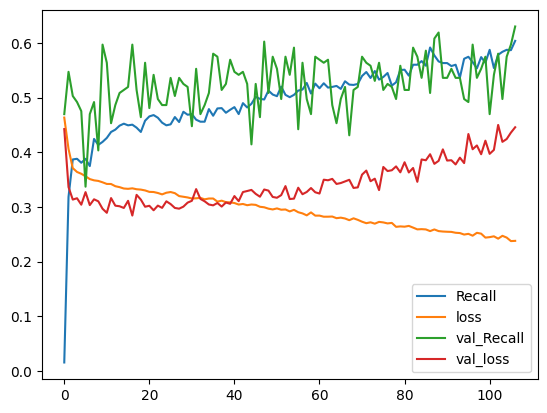

In [60]:
loss_df.plot()
plt.show()

In [61]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[731  65]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.61      0.50      0.55       204

    accuracy                           0.83      1000
   macro avg       0.74      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



## <font color='gold'> <b>ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model¶</b><font color='black'>  

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


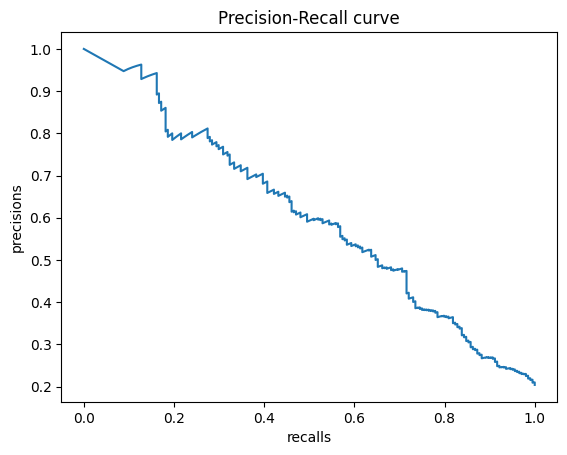

In [63]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# roc curve shows classification performance.

In [64]:
average_precision_score(y_test, y_pred_proba)

0.6043037640877735

## <font color='gold'> <b>BatchNormalization</b><font color='black'>  

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [67]:
from tensorflow.keras.optimizers import Adam

In [68]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [69]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - Recall: 0.3034 - loss: 0.5927 - val_Recall: 0.0387 - val_loss: 0.4418
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Recall: 0.1976 - loss: 0.4361 - val_Recall: 0.3149 - val_loss: 0.3809
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Recall: 0.2919 - loss: 0.4044 - val_Recall: 0.4917 - val_loss: 0.3307
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - Recall: 0.3601 - loss: 0.3840 - val_Recall: 0.5470 - val_loss: 0.3063
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Recall: 0.3846 - loss: 0.3794 - val_Recall: 0.4420 - val_loss: 0.3300
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.4242 - loss: 0.3598 - val_Recall: 0.4088 - val_loss: 0.3249
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.4188 - loss: 0.3674 - val_Recall: 0.5746 - val_loss: 0.3146
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Recall: 0.4468 - loss: 0.3601 - val_Recall: 0.4420 - val_loss: 0.3051


In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,341 (48.21 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 8,068 (31.52 KB)

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,Recall,loss,val_Recall,val_loss
0,0.186,0.524,0.039,0.442
1,0.212,0.437,0.315,0.381
2,0.329,0.400,0.492,0.331
3,0.377,0.379,0.547,0.306
4,0.409,0.368,0.442,0.330


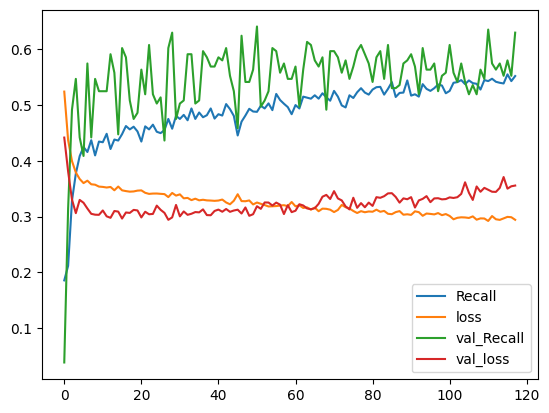

In [73]:
loss_df.plot()
plt.show()

In [74]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[746  50]
 [ 86 118]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       796
           1       0.70      0.58      0.63       204

    accuracy                           0.86      1000
   macro avg       0.80      0.76      0.78      1000
weighted avg       0.86      0.86      0.86      1000



## <font color='gold'> <b>ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model¶</b><font color='black'>  

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


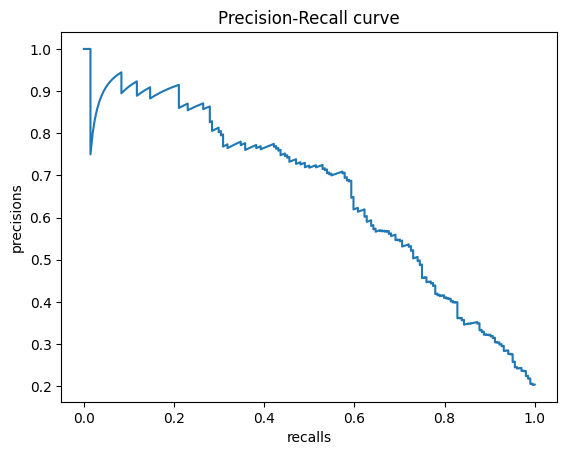

In [76]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [77]:
average_precision_score(y_test, y_pred_proba)

0.6591818590722982

## <font color='gold'> <b>with class_weigth</b><font color='black'>  

In [79]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [80]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [81]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Recall: 0.6259 - loss: 0.7056 - val_Recall: 0.5967 - val_loss: 0.5022
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7257 - loss: 0.5575 - val_Recall: 0.8066 - val_loss: 0.5383
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7356 - loss: 0.5096 - val_Recall: 0.8729 - val_loss: 0.5112
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7788 - loss: 0.5107 - val_Recall: 0.7845 - val_loss: 0.4439
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7700 - loss: 0.4930 - val_Recall: 0.8564 - val_loss: 0.4754
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7196 - loss: 0.5353 - val_Recall: 0.8343 - val_loss: 0.5129
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7620 - loss: 0.4976 - val_Recall: 0.8840 - val_loss: 0.5596
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7598 - loss: 0.4917 - val_Recall: 0.8453 - val_loss: 0.5144


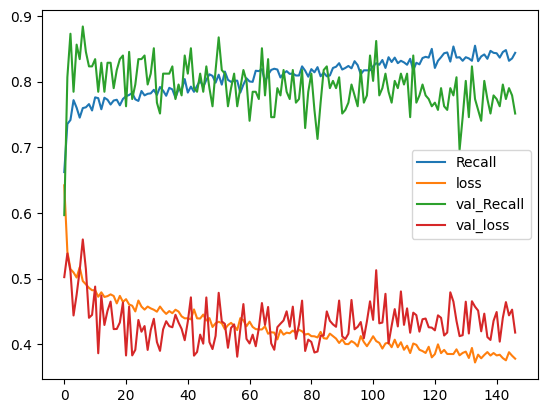

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [83]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[651 145]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       796
           1       0.50      0.71      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.73      1000
weighted avg       0.83      0.80      0.81      1000



## <font color='gold'> <b>ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model¶</b><font color='black'>  

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


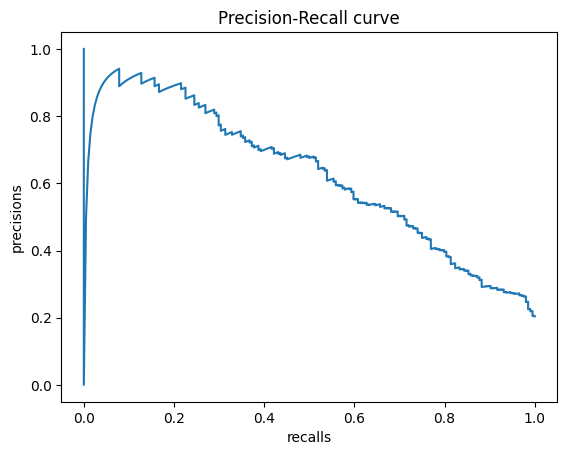

In [85]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [86]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6235327193428102

# <font color='orange'> <b>Final Model and Model Deployment</b><font color='black'>  

In [88]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [89]:
scaler = MinMaxScaler().fit(X)

In [90]:
X_scaled = scaler.transform(X)

In [91]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))      

model.add(Dense(16, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [92]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=500,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - Recall: 0.5471 - loss: 0.7091 - val_Recall: 0.5084 - val_loss: 0.5808
Epoch 2/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6489 - loss: 0.6106 - val_Recall: 0.6536 - val_loss: 0.5557
Epoch 3/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7211 - loss: 0.5507 - val_Recall: 0.6536 - val_loss: 0.5214
Epoch 4/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7384 - loss: 0.5256 - val_Recall: 0.6983 - val_loss: 0.4856
Epoch 5/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7660 - loss: 0.5157 - val_Recall: 0.6648 - val_loss: 0.5213
Epoch 6/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7497 - loss: 0.5043 - val_Recall: 0.6201 - val_loss: 0.4344
Epoch 7/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7316 - loss: 0.4978 - val_Recall: 0.7709 - val_loss: 0.5121
Epoch 8/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7596 - loss: 0.4886 - val_Recall: 0.6927 - val_loss: 0.4808


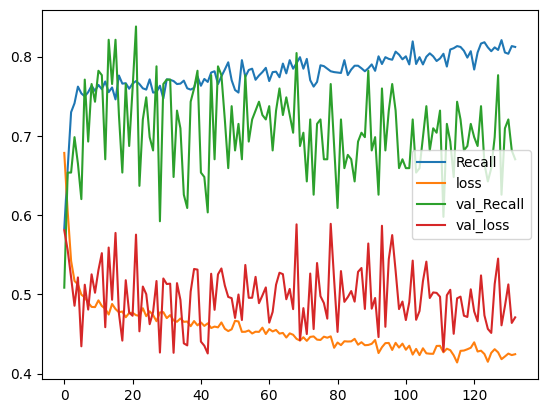

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [94]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.38638460636138916
recall :  0.8235294222831726


In [95]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[644 152]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       796
           1       0.53      0.82      0.64       204

    accuracy                           0.81      1000
   macro avg       0.74      0.82      0.76      1000
weighted avg       0.86      0.81      0.83      1000



In [96]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_churn.keras')

# <font color='orange'> <b>Prediction</b><font color='black'>  

In [98]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore                619
Age                         42
Tenure                       2
Balance                  0.000
NumOfProducts                1
HasCrCard                    1
IsActiveMember               1
EstimatedSalary     101348.880
Geography_Germany        False
Geography_Spain          False
Gender_Male              False
Name: 1, dtype: object

In [99]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [100]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1]])

In [101]:
df["Exited"].iloc[0]

1

# <font color='orange'> <b>Comparison with ML</b><font color='black'>  

## <font color='gold'> <b>Logistic Regression</b><font color='black'>  

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.70      0.72      1000



## <font color='gold'> <b>Random Forest</b><font color='black'>  

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  28]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.42      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.72      1000
weighted avg       0.84      0.85      0.84      1000



<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>